In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
# import datasets
df = pd.read_csv('/content/Train_Data.csv')
test_df = pd.read_csv('/content/Test_Data.csv')
df

,SEQN,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group
0,73564.0,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,Adult
1,73568.0,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85,Adult
2,73576.0,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14,Adult
3,73577.0,32.0,1.0,2.0,28.9,104.0,NaN,84.0,16.15,Adult
4,73580.0,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92,Adult
...,...,...,...,...,...,...,...,...,...,...
1961,83711.0,38.0,2.0,2.0,33.5,100.0,2.0,73.0,6.53,Adult
1962,83712.0,61.0,1.0,2.0,30.0,93.0,2.0,208.0,13.02,Adult
1963,83713.0,34.0,1.0,2.0,23.7,103.0,2.0,124.0,21.41,Adult
1964,83718.0,60.0,2.0,2.0,27.4,90.0,2.0,108.0,4.99,Adult


In [6]:
test_df

,SEQN,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,77017.0,34.0,1.0,1.0,32.2,96.0,2.0,135.0,15.11
1,75580.0,12.0,2.0,2.0,26.3,100.0,2.0,141.0,15.26
2,73820.0,56.0,1.0,2.0,28.6,107.0,2.0,136.0,8.82
3,80489.0,20.0,2.0,1.0,22.1,93.0,2.0,111.0,12.13
4,82047.0,64.0,1.0,1.0,24.7,91.0,2.0,105.0,3.12
...,...,...,...,...,...,...,...,...,...
307,74150.0,20.0,2.0,2.0,21.9,82.0,2.0,82.0,2.54
308,82550.0,34.0,2.0,1.0,33.3,95.0,2.0,77.0,6.36
309,77835.0,64.0,2.0,2.0,41.5,91.0,2.0,149.0,15.52
310,79281.0,23.0,2.0,2.0,22.5,82.0,2.0,93.0,1.39


In [10]:
df['DIQ010'].unique()

array([ 2., nan,  1.,  3.])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1966 entries, 0 to 1965
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEQN       1954 non-null   float64
 1   RIDAGEYR   1957 non-null   float64
 2   RIAGENDR   1948 non-null   float64
 3   PAQ605     1953 non-null   float64
 4   BMXBMI     1948 non-null   float64
 5   LBXGLU     1953 non-null   float64
 6   DIQ010     1948 non-null   float64
 7   LBXGLT     1955 non-null   float64
 8   LBXIN      1957 non-null   float64
 9   age_group  1952 non-null   object 
dtypes: float64(9), object(1)
memory usage: 153.7+ KB


In [16]:
test_df.isna().sum()

,0
SEQN,2
RIDAGEYR,3
RIAGENDR,2
PAQ605,1
BMXBMI,1
LBXGLU,1
DIQ010,1
LBXGLT,2
LBXIN,1


In [17]:
# removing NaN values

# for float64
flot_col = df.drop(['age_group'],axis=1).columns
df[flot_col] = df[flot_col].fillna(df[flot_col].mean())
test_df[flot_col] = test_df[flot_col].fillna(test_df[flot_col].mean())

# for object
df = df.fillna(df.mode().iloc[0])
test_df = test_df.fillna(test_df.mode().iloc[0])

In [18]:
df

,SEQN,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group
0,73564.0,61.0,2.0,2.0,35.7,110.000000,2.000000,150.0,14.91,Adult
1,73568.0,26.0,2.0,2.0,20.3,89.000000,2.000000,80.0,3.85,Adult
2,73576.0,16.0,1.0,2.0,23.2,89.000000,2.000000,68.0,6.14,Adult
3,73577.0,32.0,1.0,2.0,28.9,104.000000,2.015914,84.0,16.15,Adult
4,73580.0,38.0,2.0,1.0,35.9,103.000000,2.000000,81.0,10.92,Adult
...,...,...,...,...,...,...,...,...,...,...
1961,83711.0,38.0,2.0,2.0,33.5,100.000000,2.000000,73.0,6.53,Adult
1962,83712.0,61.0,1.0,2.0,30.0,93.000000,2.000000,208.0,13.02,Adult
1963,83713.0,34.0,1.0,2.0,23.7,103.000000,2.000000,124.0,21.41,Adult
1964,83718.0,60.0,2.0,2.0,27.4,90.000000,2.000000,108.0,4.99,Adult


In [19]:
df.describe()

,SEQN,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
count,1966.000000,1966.000000,1966.000000,1966.000000,1966.000000,1966.000000,1966.000000,1966.000000,1966.000000
mean,78683.621801,42.005621,1.510267,1.825397,27.965400,99.491039,2.015914,115.150384,11.862892
std,2915.173438,20.101409,0.497727,0.398126,7.293977,16.719084,0.186718,46.141920,9.734344
min,73564.000000,12.000000,1.000000,1.000000,14.500000,63.000000,1.000000,40.000000,0.140000
25%,76215.500000,24.000000,1.000000,2.000000,22.800000,91.000000,2.000000,87.000000,5.805000
50%,78700.500000,41.000000,2.000000,2.000000,26.900000,97.000000,2.000000,105.000000,9.060000
75%,81204.250000,58.000000,2.000000,2.000000,31.200000,104.000000,2.000000,130.000000,14.447500
max,83727.000000,80.000000,2.000000,7.000000,70.100000,405.000000,3.000000,604.000000,102.290000


<Axes: xlabel='age_group', ylabel='PAQ605'>

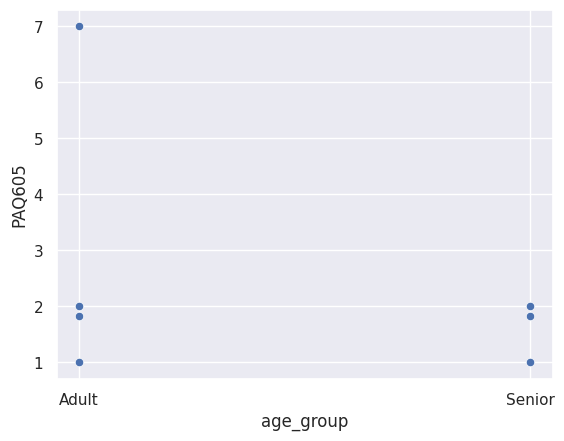

In [25]:
# plot between age and PAQ605
sns.scatterplot(x=df['age_group'],y=df['PAQ605'])

In [27]:
# prompt: find avg of PAQ605 for senior citizen and similar for adult

print("Average PAQ605 for Senior Citizen:", df[df['age_group'] == 'Senior']['PAQ605'].mean())
print("Average PAQ605 for Adult:", df[df['age_group'] == 'Adult']['PAQ605'].mean())

Average PAQ605 for Senior Citizen: 1.9097159033464766
Average PAQ605 for Adult: 1.8093700757139013


<Axes: xlabel='age_group', ylabel='count'>

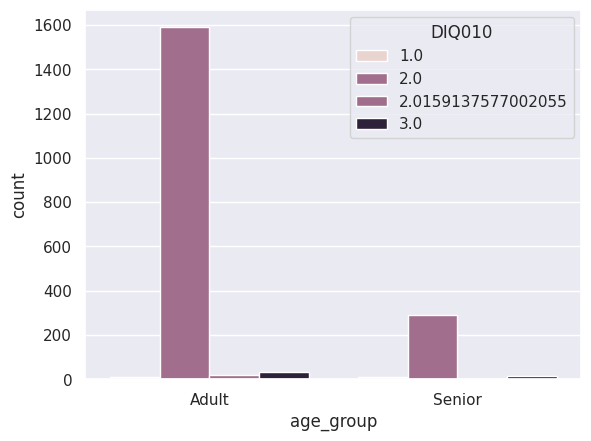

In [30]:
# plot between DIQ010 and age_group
sns.countplot(x=df['age_group'],hue=df['DIQ010'])

SEQN


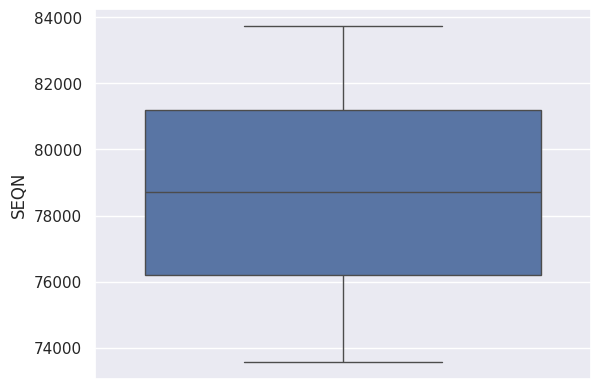

RIDAGEYR


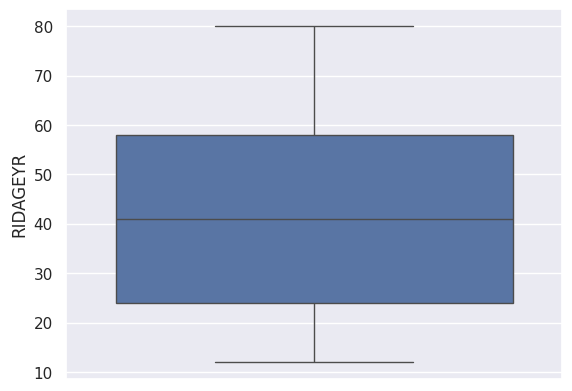

RIAGENDR


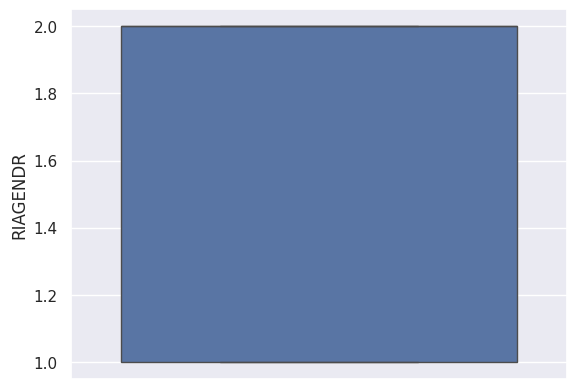

PAQ605


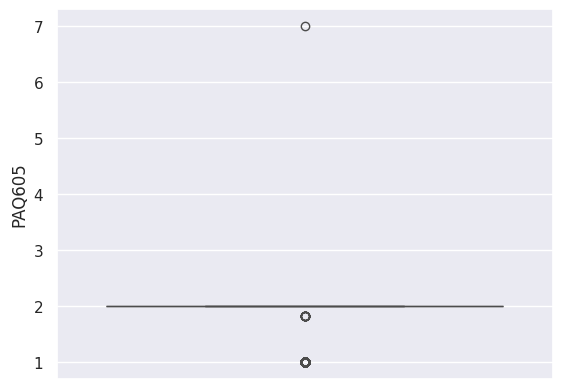

BMXBMI


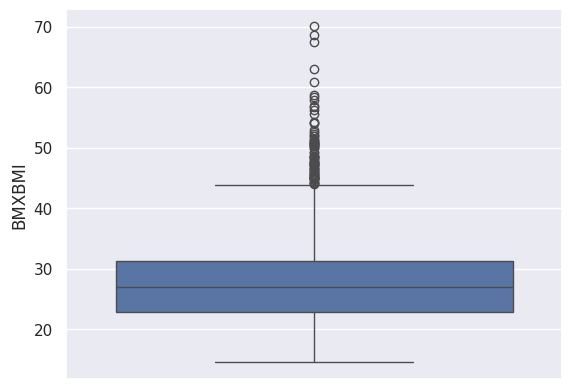

LBXGLU


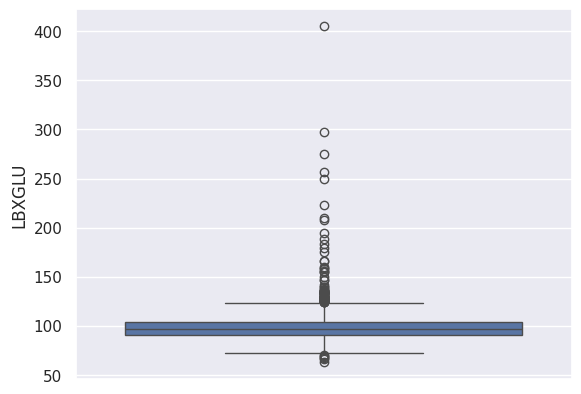

DIQ010


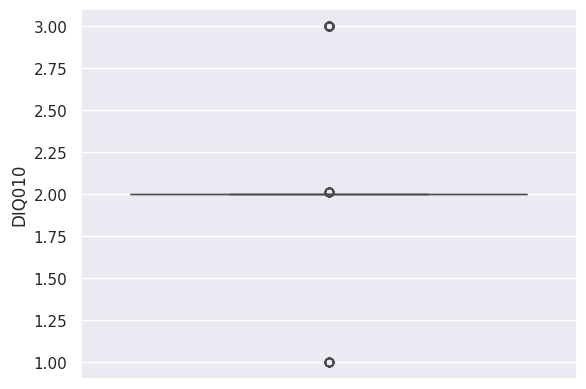

LBXGLT


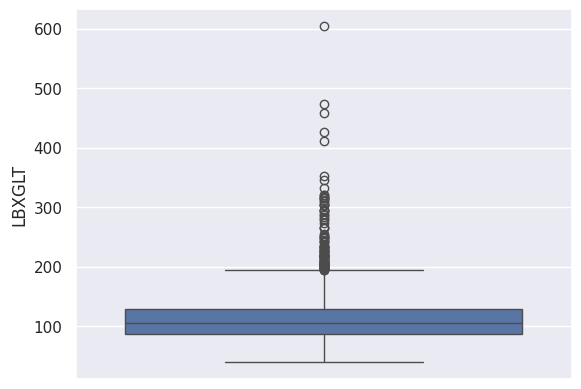

LBXIN


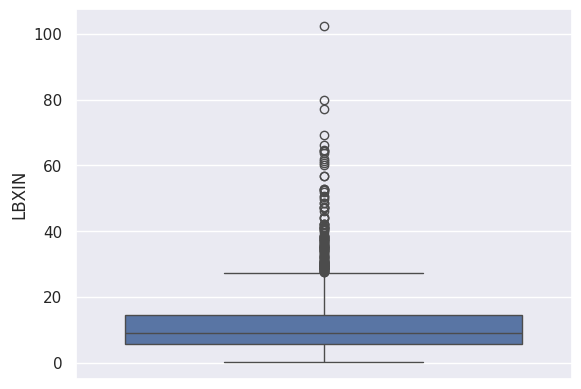

age_group


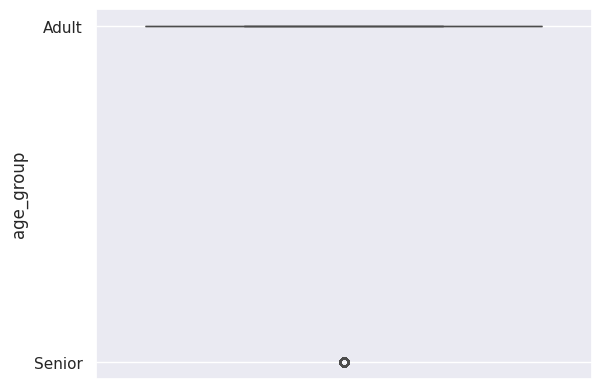

In [22]:
# check for outliers
sns.set()
for i in df.columns:
  print(i)
  sns.boxplot(df[i])
  plt.show()

In [ ]:
# feature engineeri
df["GLU_INS_Ratio"] = df["LBXGLU"] / df["LBXIN"]
test_df["GLU_INS_Ratio"] = test_df["LBXGLU"] / test_df["LBXIN"]

# insulin resistance


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = df.drop(['age_group'],axis=1)
y = df['age_group']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9847715736040609
